<a href="https://colab.research.google.com/github/hebaismail6848/Machine-Deep-learning-projects/blob/main/diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import seaborn as sns

#load_data

In [ ]:
pima=pd.read_csv('diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


In [ ]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               2
Insulin                     0
BMI                         7
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
columns_name=pima.columns

In [ ]:
from sklearn.impute import SimpleImputer,KNNImputer
# imputer = SimpleImputer(strategy='median')
imputer = KNNImputer(n_neighbors=5)
pima=imputer.fit_transform(pima)


In [ ]:
pima=pd.DataFrame(pima,columns=columns_name)
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0
768,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
769,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0
770,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [ ]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
duplicates=pima.duplicated()

pima[duplicates]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
768,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
769,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0
770,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
771,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [ ]:
len(pima)

772

In [ ]:
pima.drop_duplicates(inplace=True)

In [ ]:
len(pima)

768

In [ ]:
correlation=pima.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081271,-0.073535,0.025817,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.056886,0.331357,0.230529,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.209280,0.088933,0.298733,0.041265,0.239528,0.065068
SkinThickness,-0.081271,0.056886,0.209280,1.000000,0.435935,0.388771,0.182250,-0.114870,0.073101
Insulin,-0.073535,0.331357,0.088933,0.435935,1.000000,0.205486,0.185071,-0.042163,0.130548
BMI,0.025817,0.230529,0.298733,0.388771,0.205486,1.000000,0.140185,0.054641,0.305480
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.182250,0.185071,0.140185,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.114870,-0.042163,0.054641,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.073101,0.130548,0.305480,0.173844,0.238356,1.000000


<Axes: >

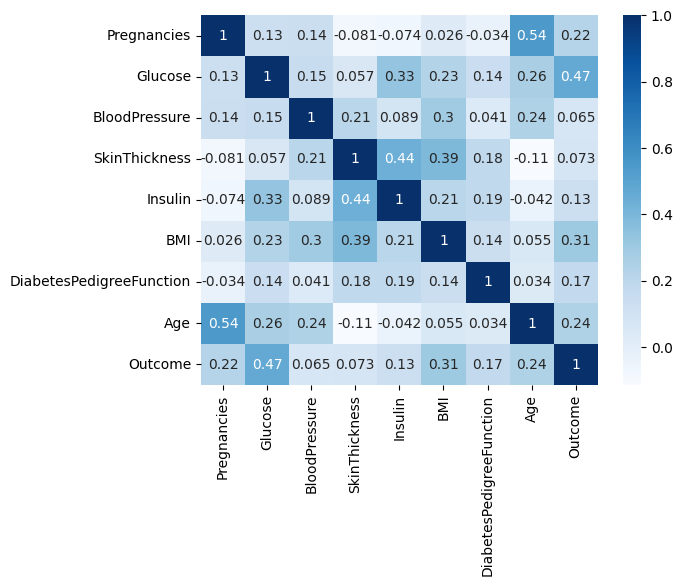

In [ ]:
sns.heatmap(correlation,annot=True,cmap='Blues')

In [ ]:
x=pima.iloc[:,:-1]
y=pima.iloc[:,-1]

In [ ]:
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
x_train,y_train,x_valid,y_valid,x_test,y_test=train_valid_test_split(pima,target='Outcome',train_size=.7,valid_size=.1,test_size=.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
    'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10]
}

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
pima['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [ ]:
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [ ]:
print(f'the best parametres are {grid_search.best_params_}')

the best parametres are {'criterion': 'entropy', 'max_depth': 4}


## Before solving Overfitting

In [ ]:
clf=DecisionTreeClassifier(criterion= 'entropy',max_depth=10)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(f'the accuracy in training = {accuracy_score(y_train,clf.predict(x_train))}')
print(f'the accuracy in validation = {accuracy_score(y_valid,clf.predict(x_valid))}')
print(f'recall in training= {recall_score(y_train, clf.predict(x_train))}')
print(f'recall in validation= {recall_score(y_valid, clf.predict(x_valid))}')

the accuracy in training = 0.9702048417132216
the accuracy in validation = 0.7532467532467533
recall in training= 0.925531914893617
recall in validation= 0.64


In [ ]:
#print(f'accuracy= {accuracy_score(y_test,y_pred)}')
#print(f'recall= {recall_score(y_test,y_pred)}')
#print(f'precision= {precision_score(y_test,y_pred)}')
#print(f'f1= {f1_score(y_test,y_pred)}')

In [ ]:
params_grid={'ccp_alpha':[0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.008,0.01]}
grid_search=GridSearchCV(
    estimator=clf,
    param_grid=params_grid,
    scoring='recall',
    cv=5
)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=10),
             param_grid={'ccp_alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
                                       0.006, 0.007, 0.008, 0.008, 0.01]},
             scoring='recall')

In [ ]:
print(f'the best parametres are {grid_search.best_params_}')

the best parametres are {'ccp_alpha': 0.003}


## After changing alpha to its best value

In [ ]:
clf=DecisionTreeClassifier(criterion= 'entropy',max_depth=10, ccp_alpha = 0.008)
clf.fit(x_train,y_train)
#y_pred=clf.predict(x_test)

DecisionTreeClassifier(ccp_alpha=0.008, criterion='entropy', max_depth=10)

In [ ]:
print(f'the accuracy in training = {accuracy_score(y_train,clf.predict(x_train))}')
print(f'the accuracy in validation = {accuracy_score(y_valid,clf.predict(x_valid))}')
print(f'recall in training= {recall_score(y_train, clf.predict(x_train))}')
print(f'recall in validation= {recall_score(y_valid, clf.predict(x_valid))}')

the accuracy in training = 0.8975791433891993
the accuracy in validation = 0.7532467532467533
recall in training= 0.8297872340425532
recall in validation= 0.64


## Changing parameter alpha reduced overfitting but the accuracy is still not the best

In [ ]:
#print(f'accuracy= {accuracy_score(y_test,y_pred)}')
#print(f'recall= {recall_score(y_test,y_pred)}')
#print(f'precision= {precision_score(y_test,y_pred)}')
#print(f'f1= {f1_score(y_test,y_pred)}')

## OverSampling minority class

In [ ]:
#!pip install imblearn
pima['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [ ]:
# create oversampler object
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# apply oversampling to the data
x_random, y_random = ros.fit_resample(x, y)

In [ ]:
# print the new class distribution
from collections import Counter
print('Resampled class distribution:', Counter(y_random))

Resampled class distribution: Counter({1.0: 500, 0.0: 500})


In [ ]:
pima_ros = x_random.join(y_random)

In [ ]:
pima_ros.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
x_train,y_train,x_valid,y_valid,x_test,y_test=train_valid_test_split(pima_ros,target='Outcome',train_size=.7,valid_size=.1,test_size=.2,random_state=42)

In [ ]:
clfros=DecisionTreeClassifier(criterion= 'entropy',max_depth=10, ccp_alpha = 0.008)
clfros.fit(x_train,y_train)
#y_pred=clf.predict(x_test)

DecisionTreeClassifier(ccp_alpha=0.008, criterion='entropy', max_depth=10)

In [ ]:
print(f'the accuracy in training = {accuracy_score(y_train,clfros.predict(x_train))}')
print(f'the accuracy in validation = {accuracy_score(y_valid,clfros.predict(x_valid))}')
print(f'recall in training= {recall_score(y_train, clfros.predict(x_train))}')
print(f'recall in validation= {recall_score(y_valid, clfros.predict(x_valid))}')

the accuracy in training = 0.8671428571428571
the accuracy in validation = 0.81
recall in training= 0.9398280802292264
recall in validation= 0.8545454545454545


## After applying Random Over Sampling Better Recall value, Reduced over fitting but also reduced accuracy

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# print the original class distribution
print('Original class distribution:', Counter(y))

Original class distribution: Counter({0.0: 500, 1.0: 268})


In [ ]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
# apply SMOTE to the data
x_smote, y_smote = smote.fit_resample(x, y)
# print the new clss distribution
print('Resampled class distribution:', Counter(y_smote))

Resampled class distribution: Counter({1.0: 500, 0.0: 500})


In [ ]:
pima_smote = x_smote.join(y_smote)

In [ ]:
pima_smote.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
x_trains,y_trains,x_valids,y_valids,x_tests,y_tests=train_valid_test_split(pima_smote,target='Outcome',train_size=.7,valid_size=.1,test_size=.2,random_state=42)

In [ ]:
clfsm=DecisionTreeClassifier(criterion= 'entropy',max_depth=10, ccp_alpha = 0.008)
clfsm.fit(x_trains,y_trains)
#y_pred=clf.predict(x_test)

DecisionTreeClassifier(ccp_alpha=0.008, criterion='entropy', max_depth=10)

In [ ]:
print(f'the accuracy in training = {accuracy_score(y_trains,clfsm.predict(x_trains))}')
print(f'the accuracy in validation = {accuracy_score(y_valids,clfsm.predict(x_valids))}')
print(f'recall in training= {recall_score(y_trains, clfsm.predict(x_trains))}')
print(f'recall in validation= {recall_score(y_valids, clfsm.predict(x_valids))}')

the accuracy in training = 0.8471428571428572
the accuracy in validation = 0.76
recall in training= 0.8882521489971347
recall in validation= 0.8545454545454545


## Random over sampling made better results than SMOTE so I'm using it for the rest of the notebook

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = AdaBoostClassifier(random_state=42)
clf3 = GradientBoostingClassifier(random_state=42)
clf4 = XGBClassifier(random_state=42)


In [ ]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__ccp_alpha'] = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param1['classifier__criterion'] = ['gini','entropy', 'log_loss']
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__learning_rate'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
param2['classifier__n_estimators'] = [10, 50, 100, 250]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__loss'] = ['log_loss', 'deviance', 'exponential']
param3['classifier__learning_rate'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
param3['classifier__ccp_alpha'] = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param3['classifier__n_estimators'] = [10, 50, 100, 250]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__learning_rate'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
param4['classifier__gamma'] = [0, 10, 50]
param4['classifier__max_depth'] = [5, 10, 20]
param4['classifier'] = [clf4]

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4]

In [ ]:
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='accuracy').fit(x_train, y_train)

In [ ]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': RandomForestClassifier(ccp_alpha=0, max_depth=20, n_estimators=10,
                        random_state=42),
 'classifier__ccp_alpha': 0,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 20,
 'classifier__n_estimators': 10}

In [ ]:
# ROC-AUC score for the best model
gs.best_score_

0.8371428571428572

In [ ]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = AdaBoostClassifier(random_state=42)
clf3 = GradientBoostingClassifier(random_state=42)
clf4 = XGBClassifier(random_state=42)

In [ ]:
clf2.fit(x_train,y_train)
print(f'the accuracy in training = {accuracy_score(y_train,clf2.predict(x_train))}')
print(f'the accuracy in validation = {accuracy_score(y_valid,clf2.predict(x_valid))}')
print(f'Testing Accuracy: {accuracy_score(y_test,clf2.predict(x_test))}')

the accuracy in training = 0.8657142857142858
the accuracy in validation = 0.77
Testing Accuracy: 0.79


In [ ]:
clf3.fit(x_train,y_train)
print(f'the accuracy in training = {accuracy_score(y_train,clf3.predict(x_train))}')
print(f'the accuracy in validation = {accuracy_score(y_valid,clf3.predict(x_valid))}')
print(f'Testing Accuracy: {accuracy_score(y_test,clf3.predict(x_test))}')

the accuracy in training = 0.9257142857142857
the accuracy in validation = 0.78
Testing Accuracy: 0.805


In [ ]:
clf4.fit(x_train,y_train)
print(f'the accuracy in training = {accuracy_score(y_train,clf4.predict(x_train))}')
print(f'the accuracy in validation = {accuracy_score(y_valid,clf4.predict(x_valid))}')
print(f'Testing Accuracy: {accuracy_score(y_test,clf4.predict(x_test))}')

the accuracy in training = 1.0
the accuracy in validation = 0.79
Testing Accuracy: 0.82


In [ ]:
rf = RandomForestClassifier(criterion= 'gini',max_depth=20, n_estimators=10, random_state=42)
rf.fit(x_train,y_train)
#y_pred=clf.predict(x_test)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)

In [ ]:
print(f'the accuracy in training = {accuracy_score(y_train,rf.predict(x_train))}')
print(f'the accuracy in validation = {accuracy_score(y_valid,rf.predict(x_valid))}')
print(f'recall in training= {recall_score(y_train, rf.predict(x_train))}')
print(f'recall in validation= {recall_score(y_valid, rf.predict(x_valid))}')

the accuracy in training = 0.9957142857142857
the accuracy in validation = 0.84
recall in training= 0.994269340974212
recall in validation= 0.8181818181818182


In [ ]:
print(f'Testing Accuracy: {accuracy_score(y_test,rf.predict(x_test))}')

Testing Accuracy: 0.82
